![Astrofisica Computacional](../logo.PNG)

---
## 01. 

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

The 


---

In [1]:
#%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from schwarzschild import *

### Initial Conditions

In [2]:
def initCond(x, k, metric):
    '''
    Given the initial conditions (x,k)
    this function returns the list
    [t, r, theta, phi, k_t, k_r, k_theta, k_phi] 
    with the initial conditions needed to solve 
    the geodesic equations 
    (with the covariant components of the momentum vector)    
    # Coordinates
    t = x[0]
    r = x[1]
    theta = x[2]
    phi = x[3]
    kt = k[0]
    kr = k[1]
    ktheta = k[2]
    kphi = k[3]
    '''
        
    # Metric components
    g_tt, g_rr, g_thth, g_phph = metric(x, M=M)
    
    # Lower k-indices
    k_t = g_tt*k[0] 
    k_r = g_rr*k[1]
    k_th = g_thth*k[2]
    k_phi = g_phph*k[3]
    
    return [x[0], x[1], x[2], x[3], k_t, k_r, k_th, k_phi]

## Photon Class
Image Plane 

In [3]:
class Photon:
    def __init__(self, Alpha=1., Beta=0., freq=1., D=100., i = np.pi/4):
        '''
        Given the initial coordinates in the image plane (X,Y), the distance D 
        to the force center and inclination angle i, this calculates the 
        initial coordinates in spherical coordinates (r, theta, phi)
        ''' 
        # Initial Cartesian Coordinates in the Image Plane
        self.Alpha = Alpha
        self.Beta = Beta
        self.D = D
        self.i = i
        
        # Transformation from (Alpha, Beta, D) to (r, theta, phi) 
        self.r = np.sqrt(self.Alpha**2 + self.Beta**2 + self.D**2)
        self.theta = np.arccos((self.Beta*np.sin(self.i)
                        +self.D*np.cos(self.i))/self.r)
        self.phi = np.arctan(self.Alpha/(self.D*np.sin(self.i)
                                        - self.Beta*np.cos(self.i)))
        
        '''
        Initial values in spherical coordinates of the photon
        (t=0, r, theta, phi)
        '''   
        self.xin = [0., self.r, self.theta, self.phi]
        
                
        '''
        Given the frequency value k0, this calculates the initial values for 
        the 4-momentum of the photon
        (kt, kr, ktheta, kphi)
        '''  
        self.K0 =  freq
        
        # Initial 4-momentum components
        self.kr =  (self.D/self.r)*self.K0
        
        aux = self.Alpha**2 + (-self.Beta*np.cos(self.i) 
                                + self.D*np.sin(self.i))**2 
        
        self.ktheta = (self.K0/np.sqrt(aux))*(
                - np.cos(self.i) 
                + (self.Beta*np.sin(self.i) + self.D* np.cos(self.i))
                   *(self.D/(self.r**2)))
        
        self.kphi = - self.Alpha*np.sin(self.i)*self.K0/aux
        
        self.kt = np.sqrt(self.kr**2 + self.r**2 * self.ktheta**2 
                          + self.r**2*(np.sin(self.theta))**2 *self.kphi**2)
        
        '''
        Initial values in spherical coordinates for the 4-momentum of 
        the photon(kt, kr, ktheta, kphi)
        '''   
        self.kin = [self.kt, self.kr, self.ktheta, self.kphi]
                
    
    def initConds(self, initialConds):
        '''
        Stores the initial values of coordinates and momentum needed 
        to solve the geodesic equations.
        '''
        self.iC = initialConds
        return 
    
    def finalPosition(self, finalPos):
        '''
        Stores the initial values of coordinates and momentum needed 
        to solve the geodesic equations.
        '''
        self.fP = finalPos
        return 

In [64]:
def plot3D(sol):
    x = sol[:,1]*np.sin(sol[:,2])*np.cos(sol[:,3])
    y = sol[:,1]*np.sin(sol[:,2])*np.sin(sol[:,3])
    z = sol[:,1]*np.cos(sol[:,2])
    
    # draw black hole
    #u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    #xs = 2*M*np.cos(u)*np.sin(v)
    #ys = 2*M*np.sin(u)*np.sin(v)
    #zs = 2*M*np.cos(v)
    
    ax = plt.figure().add_subplot(projection='3d')
    #ax.plot_surface(xs, ys, zs, color='k')
    ax.scatter(0,0,0, color='black')
    ax.plot(x, y, z, color='crimson')
    #ax.set_xlim(-20,20)
    #ax.set_ylim(-20,20)
    #ax.set_zlim(-15,15)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    #ax.view_init(elev=10., azim=30)
    plt.show()

[0.0, 100.0, 1.5707963267948966, 0.0, -0.98, 1.0204081632653061, 0.0, -0.0]


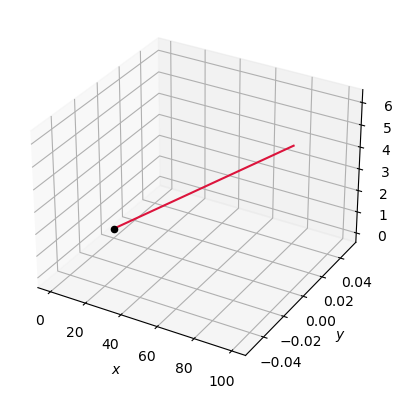

[  0.         100.           1.57079633   0.          -0.98
   1.02040816   0.          -0.        ]
[100.05115442   4.98798881   1.57079633   0.          -0.98
   1.65644914   0.           0.        ]


In [70]:
M = 1

# Initial Conditions
alpha = 0.
beta = 0.

p = Photon(Alpha=alpha, Beta=beta, i=np.pi/2)

p.initConds(initCond(p.xin, p.kin, g))

print(p.iC)
# Independent parameter range
lmbda = np.linspace(0,-100,1000)

# Integration and plot
sol = odeint(geodesics, p.iC, lmbda, args=(M,))
plot3D(sol[0:980])
print(sol[0])
print(sol[950])

In [63]:
b= 0
x = sol[b,1]*np.sin(sol[b,2])*np.cos(sol[b,3])
y = sol[b,1]*np.sin(sol[b,2])*np.sin(sol[b,3])
z = sol[b,1]*np.cos(sol[b,2])

x,y,z

(100.0, 0.0, 6.123233995736766e-15)

In [61]:
np.cos(sol[0,2]), np.cos(np.pi/2)

(0.009999000149975224, 6.123233995736766e-17)

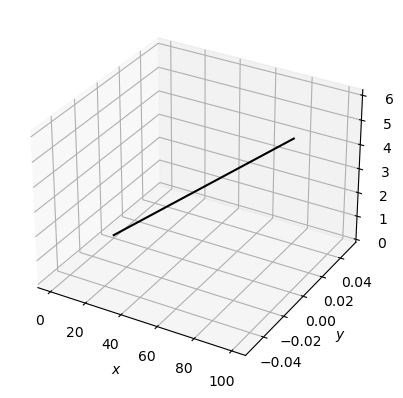

In [73]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot([100.0,0], [0.0,0], [6.1e-15,0], color='black')
#ax.plot(x, y, z, color='crimson')
#ax.set_xlim(-20,20)
#ax.set_ylim(-20,20)
#ax.set_zlim(-15,15)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
#ax.set_zlabel(r'$z$')
#ax.view_init(elev=10., azim=30)
plt.show()

## 